In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
import os


In [5]:
import cv2

In [6]:
import json

In [7]:
from PIL import Image,ImageDraw

In [8]:
with open('cat_dog_annotations.json') as f:
    data = json.load(f)

print(data.keys())

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])


In [9]:
with open('cat_dog_annotations.json') as f:
    data = json.load(f)

_via_attributes = data['_via_attributes']
print(_via_attributes.keys())

dict_keys(['region', 'file'])


In [10]:
# Access the project name
project_name = data['_via_settings']['project']['name']
print(f"Project name: {project_name}")

# Access image metadata
for image_id, image_data in data['_via_img_metadata'].items():
    filename = image_data['filename']
    size = image_data['size']
    regions = image_data['regions']
    print(f"Image ID: {image_id}")
    print(f"Filename: {filename}")
    print(f"Size: {size}")
    print(f"Regions: {regions}")

Project name: via_project_18Oct2022_11h49m
Image ID: 1.jpeg45602
Filename: 1.jpeg
Size: 45602
Regions: [{'shape_attributes': {'name': 'rect', 'x': 284, 'y': 27, 'width': 365, 'height': 478}, 'region_attributes': {'class': {'dog': True}}}]
Image ID: 2.jpeg4669
Filename: 2.jpeg
Size: 4669
Regions: [{'shape_attributes': {'name': 'rect', 'x': 6, 'y': 39, 'width': 150, 'height': 107}, 'region_attributes': {'class': {'dog': True}}}, {'shape_attributes': {'name': 'rect', 'x': 160, 'y': 77, 'width': 99, 'height': 65}, 'region_attributes': {'class': {'cat': True}}}]
Image ID: 3.jpeg6828
Filename: 3.jpeg
Size: 6828
Regions: [{'shape_attributes': {'name': 'rect', 'x': 57, 'y': 3, 'width': 186, 'height': 141}, 'region_attributes': {'class': {'cat': True}}}]
Image ID: 4.jpeg198685
Filename: 4.jpeg
Size: 198685
Regions: [{'shape_attributes': {'name': 'rect', 'x': 85, 'y': 307, 'width': 830, 'height': 1442}, 'region_attributes': {'class': {'cat': True}}}]
Image ID: 5.jpeg54509
Filename: 5.jpeg
Size: 

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\1.jpeg


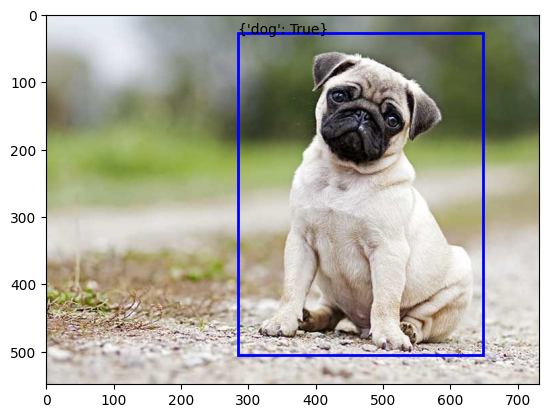

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\2.jpeg


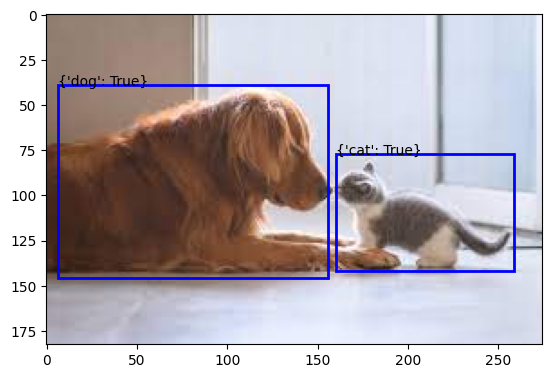

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\3.jpeg


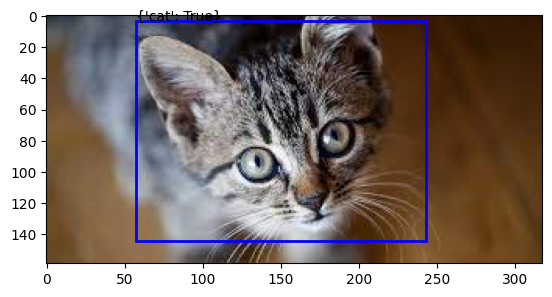

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\4.jpeg


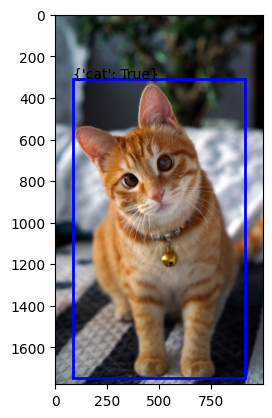

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\5.jpeg


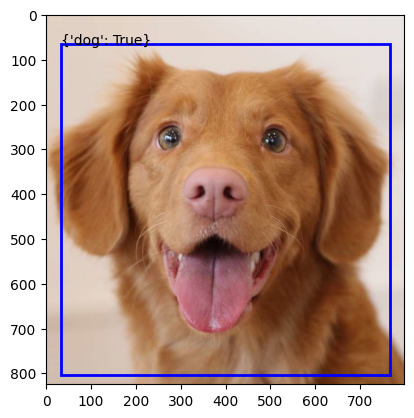

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\6.jpeg


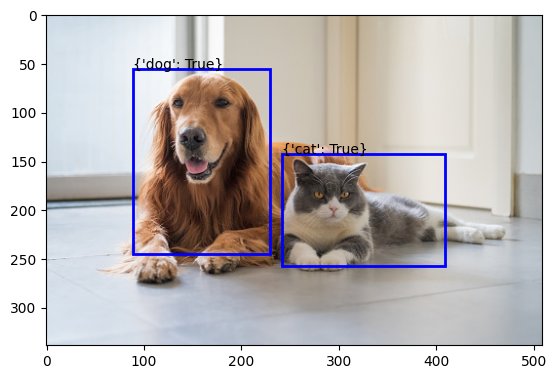

C:\Users\Hassan Lodhi\Desktop\Programmer-Force\cat_dog\7.jpeg


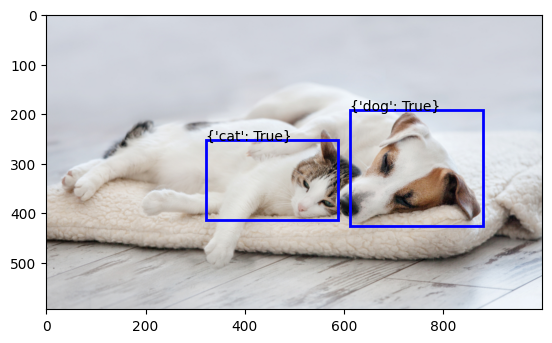

In [12]:
for image_id, image_data in data['_via_img_metadata'].items():
    file_path =  os.path.join(os.getcwd(), image_data['filename'])
    print(file_path)
    image_cv2 = cv2.imread(file_path)
    
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    ax.imshow(image_rgb)

    for region in image_data['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = region['region_attributes']['class']

        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, label, color='k', fontsize=10)


    plt.show()